**Importing necessary libraries**

In [2]:
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

The MNIST dataset is a collection of 70,000 handwritten digits, and it is often used for training machine learning models.

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print("Training Set:    {} samples".format(len(x_train)))
print("Test Set:        {} samples".format(len(x_test)))

Training Set:    60000 samples
Test Set:        10000 samples


In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train.shape

(60000, 28, 28)

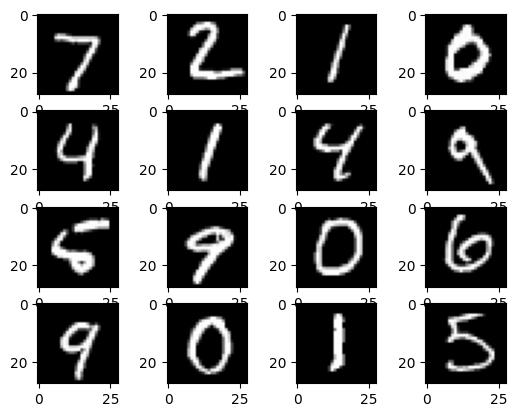

In [7]:
import matplotlib.pyplot as plt

for i in range(16):# to plot 8 images
    plt.subplot(4,4, i+1) # In 4x4 grid 
    plt.imshow(x_test[i, :, :], cmap='gray') 
    ''' it is called from the x_test data
    set The `imshow()` function is used to display each image,the `cmap='gray' 
    argument is used to display the images in grayscale.'''

In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [9]:
x_train.shape

(60000, 28, 28, 1)

In [10]:
x_test.shape

(10000, 28, 28, 1)

60000 (samples) x 28 (image dimension 1) x 28 (image dim. 2) x 1 (grayscale value)

(0,0)Pad 0(as in the amount) values before and after each row

(2,2)Pad 2 before and 2 after each value of dim. 1 of your image data: 28 values -> 32

(2,2)Pad 2 before and 2 after each value of dim. 2 of your image data: 28 values -> 32

(0,0)Pad, again, nothing in the grayscale value dimension

In [11]:
import numpy as np
# Pad images with 0s
# Transform 28x28 images into 32x32 images (by adding padding) that LeNet can process
x_train      = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_test       = np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)), 'constant') 

In [12]:
print("Updated Image Shape1: {}".format(x_train.shape))
print("Updated Image Shape2: {}".format(x_train[0].shape))

Updated Image Shape1: (60000, 32, 32, 1)
Updated Image Shape2: (32, 32, 1)


In [13]:
print(y_train)

[5 0 4 ... 5 6 8]


In [14]:
x_train[0].shape

(32, 32, 1)

In [15]:
# Normalization
x_train = x_train / 255
x_test = x_test / 255

# One Hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [16]:
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [17]:
print(type(x_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Bulding Model Architecture

In [18]:
model = Sequential()
# 6 filters, kernel size - 5x5, Relu activation function is used and input shape of the mode is 32x32x1 (where 1 represents gray scale)
# Output of the below convolution layer will be the 28x28x6
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
#The Second layer in the model uses the Max pooling layer with pool size of 2x2
# The output of the Below Pool layer will be 14x14x16
model.add(MaxPooling2D(pool_size=(2, 2)))
# 16 filters, kernel size - 5x5, Relu activation function is used
#The o/p of the below Convolution layer will be 10x10x16
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# The second max pooling layer has a pool size of (2,2)
# The output of the Below Pool layer will be 5x5x16
model.add(MaxPooling2D(pool_size=(2, 2)))
# Now feature map is ready
model.add(Flatten()) # flatten will convert the layer into 1-Dimensional Array So it becomes 5*5*16=400
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax')) # softmax converts scores into probabilities

The compile() method takes three arguments: the loss function, the optimizer, and the metrics.

In [19]:
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [20]:
model.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1, validation_data=(x_test, y_test))

Epoch 1/15
469/469 [==============================] - 12s 22ms/step - loss: 0.2859 - accuracy: 0.9161 - val_loss: 0.0873 - val_accuracy: 0.9732
Epoch 2/15
469/469 [==============================] - 11s 22ms/step - loss: 0.0809 - accuracy: 0.9753 - val_loss: 0.0541 - val_accuracy: 0.9813
Epoch 3/15
469/469 [==============================] - 11s 23ms/step - loss: 0.0587 - accuracy: 0.9821 - val_loss: 0.0407 - val_accuracy: 0.9865
Epoch 4/15
469/469 [==============================] - 11s 24ms/step - loss: 0.0431 - accuracy: 0.9868 - val_loss: 0.0385 - val_accuracy: 0.9869
Epoch 5/15
469/469 [==============================] - 11s 23ms/step - loss: 0.0360 - accuracy: 0.9887 - val_loss: 0.0381 - val_accuracy: 0.9860
Epoch 6/15
469/469 [==============================] - 11s 23ms/step - loss: 0.0299 - accuracy: 0.9903 - val_loss: 0.0339 - val_accuracy: 0.9890
Epoch 7/15
469/469 [==============================] - 11s 24ms/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0416 - val_accuracy:

In [21]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 8ms/step - loss: 0.0334 - accuracy: 0.9895
Test Loss: 0.03336266055703163
Test accuracy: 0.9894999861717224


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4